In [1]:
# library imports
import pandas as pd 
import numpy as np 
import time

In [2]:
train_df = pd.read_csv("clean_data/train.csv")
train_df.head()

,Unnamed: 0,station_id,Ammonium_2019,Ammonium_2020,Coli-like-bacteria_2019,Coli-like-bacteria_2020,Colony-count-at-22-C_2019,Colony-count-at-22-C_2020,Color-Pt/Co-scale_2019,Color-Pt/Co-scale_2020,...,Odour-dilution-level_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,2,205,0.050,0.240000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.0,1.00,1.0,1.0,7.80,7.70,0,0,0
1,3,1228,0.090,0.050000,0.0,0.0,15.0,2.0,4.0,4.0,...,1.25,1.0,1.25,0.5,0.5,7.44,7.58,0,0,0
2,4,470,0.060,0.050000,0.0,2.0,1.0,31.0,3.5,3.5,...,1.50,1.0,1.50,0.2,44.0,7.70,8.00,0,1,0
3,5,614,0.120,0.130000,0.0,0.0,97.0,300.0,3.0,3.0,...,1.75,1.0,1.75,0.5,0.5,8.64,8.45,0,0,1
4,6,1420,0.175,0.163333,0.0,0.0,53.0,15.0,4.0,4.0,...,2.00,1.0,2.00,1.0,1.0,7.50,8.00,0,0,0


In [3]:
test_df = pd.read_csv("clean_data/test.csv")
test_df.head()

,Unnamed: 0,station_id,Ammonium_2019,Ammonium_2020,Coli-like-bacteria_2019,Coli-like-bacteria_2020,Colony-count-at-22-C_2019,Colony-count-at-22-C_2020,Color-Pt/Co-scale_2019,Color-Pt/Co-scale_2020,...,Odour-dilution-level_2019,Odour-dilution-level_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020
0,0,163,0.080,0.080000,0.0,0.0,12.000000,12.0,11.7,12.1,...,1.0,1.0,1.0,1.0,1.18,1.90,8.17,8.12,0,0
1,1,167,0.080,0.080000,0.0,0.0,35.333333,73.5,7.7,9.1,...,1.0,3.0,1.0,3.0,3.90,1.54,7.83,7.81,1,0
2,2,171,0.065,0.085000,0.0,0.0,58.666667,135.0,4.0,2.0,...,2.0,1.0,2.0,1.0,1.40,1.50,7.50,7.60,0,1
3,3,174,0.050,0.090000,0.0,0.0,82.000000,8.0,5.0,6.0,...,2.0,8.0,2.0,8.0,1.00,1.00,7.70,7.80,0,0
4,4,178,0.050,0.076667,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.00,1.00,7.50,7.40,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    388 non-null    int64  
 1   station_id                    388 non-null    int64  
 2   Ammonium_2019                 388 non-null    float64
 3   Ammonium_2020                 388 non-null    float64
 4   Coli-like-bacteria_2019       388 non-null    float64
 5   Coli-like-bacteria_2020       388 non-null    float64
 6   Colony-count-at-22-C_2019     388 non-null    float64
 7   Colony-count-at-22-C_2020     388 non-null    float64
 8   Color-Pt/Co-scale_2019        388 non-null    float64
 9   Color-Pt/Co-scale_2020        388 non-null    float64
 10  Electrical-conductivity_2019  388 non-null    float64
 11  Electrical-conductivity_2020  388 non-null    float64
 12  Escherichia-coli_2019         388 non-null    float64
 13  Esche

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    156 non-null    int64  
 1   station_id                    156 non-null    int64  
 2   Ammonium_2019                 156 non-null    float64
 3   Ammonium_2020                 156 non-null    float64
 4   Coli-like-bacteria_2019       156 non-null    float64
 5   Coli-like-bacteria_2020       156 non-null    float64
 6   Colony-count-at-22-C_2019     156 non-null    float64
 7   Colony-count-at-22-C_2020     156 non-null    float64
 8   Color-Pt/Co-scale_2019        156 non-null    float64
 9   Color-Pt/Co-scale_2020        156 non-null    float64
 10  Electrical-conductivity_2019  156 non-null    float64
 11  Electrical-conductivity_2020  156 non-null    float64
 12  Escherichia-coli_2019         156 non-null    float64
 13  Esche

# Importing classifiers

Here we are testing 13 different classification algorithms. Algorithms were chosen so that they would all be different and work on classification task. 

Insipiration from here: https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods and here https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "Logistic Regression",
    "XGBoost",
    "SGD",
    "Gradient Boosting Classifier"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(), # kernel = "rbf" by default
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

# Iterate over classifiers

In [8]:
# supress warnings - as we use deault values, some classifiers give warnings. Mainly logistic regression and Linear Discriminant analysis.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We use compliance_2020 for algorithm evaluation because test data does not have prediction value for compliance_2021.

In [9]:
X_test = test_df.iloc[:,:27]
y_test = test_df['compliance_2020']

X_train = train_df.iloc[:,:27]
y_train = train_df['compliance_2020']

Beacuse some of the classifiers have very varying results depending on the random state, we run them trough 100 iterations to get their average accuracy score. We use accuracy score to compare algorihtms

In [10]:
iterations = 100
results = {}
time_result = {}


for i in range(iterations):
    for classifier_name, classifer in zip(names, classifiers):
            start_time = time.time()
            classifer.fit(X_train, y_train)
            score = classifer.score(X_test, y_test)
            end_time = time.time()
            totalTime = end_time - start_time
            if classifier_name in results:
                results[classifier_name].append(score)
                time_result[classifier_name].append(totalTime)
            else:
                results[classifier_name] = [score]
                time_result[classifier_name] = [totalTime]


In [38]:
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
end_time = time.time()
totalTime = end_time - start_time
print(totalTime)

0.1806015968322754


# Plot classifier results

First we plot all classifier scores over 100 iterations, to see how they vary.

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

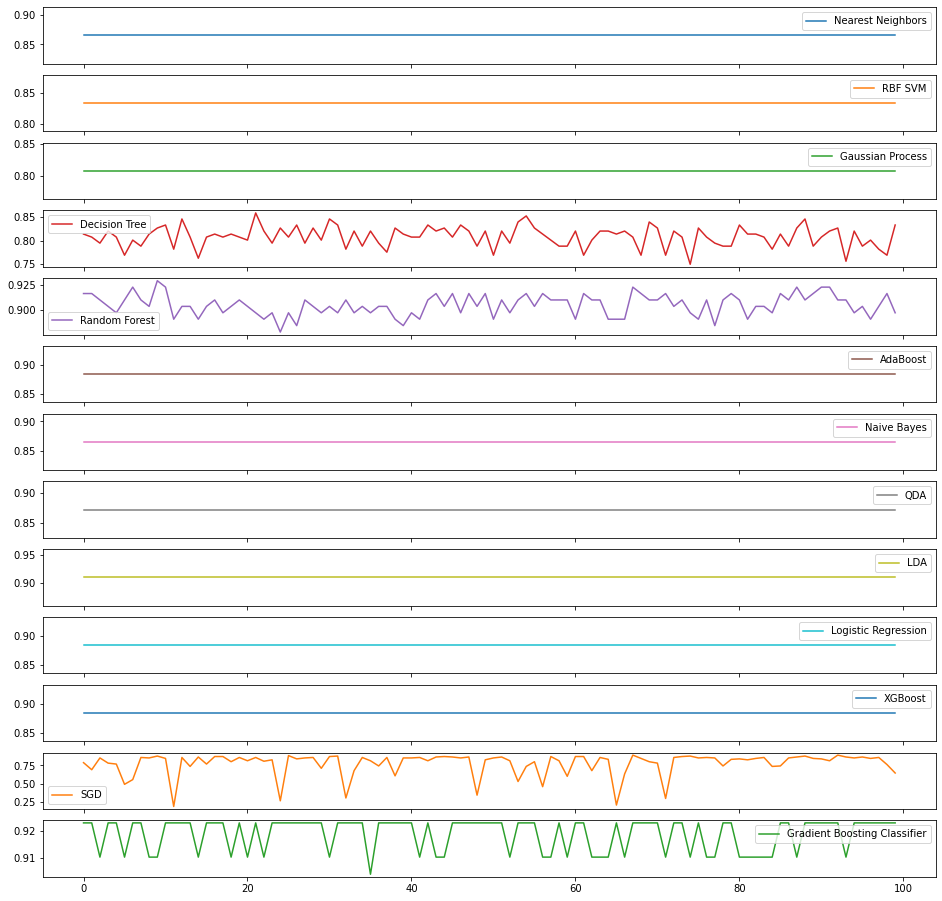

In [11]:
my_df = pd.DataFrame(data=results, columns=names)
my_df.plot(subplots=True, layout=(13,1), figsize=(16,16))

To compare classifier scores, we plot them to a single plot

<AxesSubplot:>

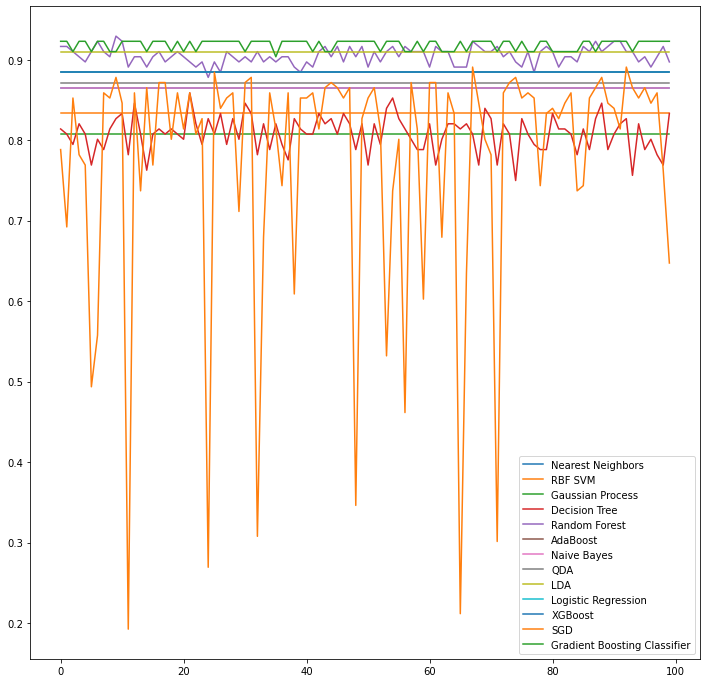

In [12]:
my_df.plot(figsize=(12,12))

<AxesSubplot:>

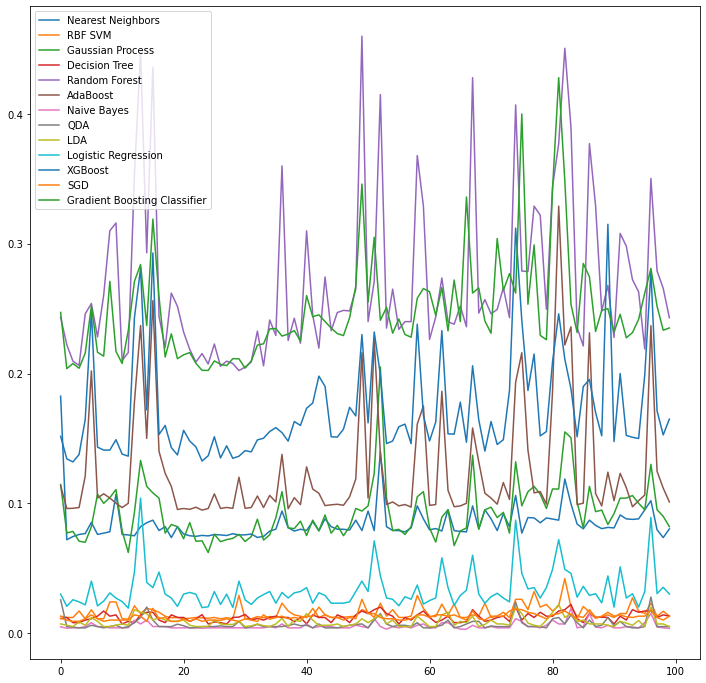

In [15]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df.plot(figsize=(12,12))

# How long one run took on average

In [17]:
time_mean_results = []
for key in names:
    mean = np.array(time_result[key]).mean()
    time_mean_results.append(mean)
    
timeMeanDf = pd.DataFrame(data=[time_mean_results], columns=names).T.sort_values(by=0, ascending=False)
timeMeanDf

,0
Random Forest,0.269990
Gradient Boosting Classifier,0.247990
XGBoost,0.172497
AdaBoost,0.125692
Gaussian Process,0.092812
Nearest Neighbors,0.084383
Logistic Regression,0.033173
RBF SVM,0.015786
SGD,0.012523
Decision Tree,0.012217


# How long 100 iterations took per classifier

In [39]:
time_sum_results = []
for key in names:
    summed = np.array(time_result[key]).sum()
    time_sum_results.append(summed)
    
timeSumDf = pd.DataFrame(data=[time_sum_results], columns=names).T.sort_values(by=0, ascending=False)
timeSumDf

,0
Random Forest,26.998970
Gradient Boosting Classifier,24.798990
XGBoost,17.249714
AdaBoost,12.569248
Gaussian Process,9.281203
Nearest Neighbors,8.438302
Logistic Regression,3.317276
RBF SVM,1.578631
SGD,1.252322
Decision Tree,1.221738


In [18]:
mean_results = []
for key in names:
    mean = np.array(results[key]).mean()
    mean_results.append(mean)
    
meanDf = pd.DataFrame(data=[mean_results], columns=names).T.sort_values(by=0, ascending=False)
meanDf

,0
Gradient Boosting Classifier,0.918910
LDA,0.910256
Random Forest,0.905256
AdaBoost,0.884615
Logistic Regression,0.884615
XGBoost,0.884615
QDA,0.871795
Nearest Neighbors,0.865385
Naive Bayes,0.865385
RBF SVM,0.833333


In [14]:
median_results = []
for key in names:
    median = np.median(results[key])
    median_results.append(median)
    
medianDf = pd.DataFrame(data=[median_results], columns=names).T.sort_values(by=0, ascending=False)
medianDf

,0
Gradient Boosting Classifier,0.923077
LDA,0.910256
Random Forest,0.903846
AdaBoost,0.884615
Logistic Regression,0.884615
XGBoost,0.884615
QDA,0.871795
Nearest Neighbors,0.865385
Naive Bayes,0.865385
SGD,0.846154


## Results

As it seems the best performing classifier is Gradient Boosting Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html